In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

**Importing the dataset**

In [ ]:
df = pd.read_csv("/content/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
# data cleaning
df = df.drop('User ID',axis=1)

In [ ]:
# encoding
le = LabelEncoder()
gender = le.fit_transform(df['Gender'])
df.Gender = gender

In [ ]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [ ]:
X = df.iloc[:,:3].values
y = df.iloc[:,-1].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

**Feature Scaling**

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Fitting Decision Tree Classification to the Training set**

In [ ]:
# finding the best depth
for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  
  dt = DecisionTreeClassifier(max_depth=depth) 
  dt.fit(X_train, y_train) 
  trainAccuracy = accuracy_score(y_test, dt.predict(X_test))  # to detect overfitting, we need both train_data accuracy, test_data accuracy
  
  dt = DecisionTreeClassifier(max_depth=depth)   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X, y, cv=10)    # test_dataset accuracy
  
  print("depth: ",depth, "train_accuracy: ", trainAccuracy, "validation_accuracy: ",np.mean(valAccuracy))


depth:  1 train_accuracy:  0.8375 validation_accuracy:  0.825
depth:  2 train_accuracy:  0.8625 validation_accuracy:  0.8949999999999999
depth:  3 train_accuracy:  0.875 validation_accuracy:  0.85
depth:  4 train_accuracy:  0.8375 validation_accuracy:  0.8724999999999999
depth:  5 train_accuracy:  0.85 validation_accuracy:  0.865
depth:  6 train_accuracy:  0.8625 validation_accuracy:  0.8625
depth:  7 train_accuracy:  0.8 validation_accuracy:  0.86
depth:  8 train_accuracy:  0.8125 validation_accuracy:  0.85
depth:  9 train_accuracy:  0.8125 validation_accuracy:  0.8525
depth:  10 train_accuracy:  0.7875 validation_accuracy:  0.8475000000000001
depth:  20 train_accuracy:  0.8 validation_accuracy:  0.8474999999999999
depth:  40 train_accuracy:  0.8 validation_accuracy:  0.845
depth:  60 train_accuracy:  0.8125 validation_accuracy:  0.8375


Interpretation of the above:
* at depth=2, we get maximum cv score

In [ ]:
# applying the best depth
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

**Predicting the Test set results**

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
# comparing

compare = pd.DataFrame({'actual':y_test,'predicted':y_pred})
compare.head()

,actual,predicted
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


**Making the Confusion Matrix**

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print("confusion matrix:")
print(cm)

auc = roc_auc_score(y_test,y_pred)
print("auroc score: ", auc)

confusion matrix:
[[46 11]
 [ 0 23]]
auroc score:  0.9035087719298246


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89        57
           1       0.68      1.00      0.81        23

    accuracy                           0.86        80
   macro avg       0.84      0.90      0.85        80
weighted avg       0.91      0.86      0.87        80



* auroc score = 0.90
* f1 score = 0.86
* This shows that the model is a good model

**Visualising the Training set results**

[Text(0.5, 0.8333333333333334, 'X[1] <= 0.663\ngini = 0.469\nsamples = 320\nvalue = [200, 120]'),
 Text(0.25, 0.5, 'X[2] <= 0.571\ngini = 0.297\nsamples = 232\nvalue = [190, 42]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.079\nsamples = 193\nvalue = [185, 8]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.224\nsamples = 39\nvalue = [5, 34]'),
 Text(0.75, 0.5, 'X[2] <= -0.687\ngini = 0.201\nsamples = 88\nvalue = [10, 78]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 36\nvalue = [0, 36]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.311\nsamples = 52\nvalue = [10, 42]')]

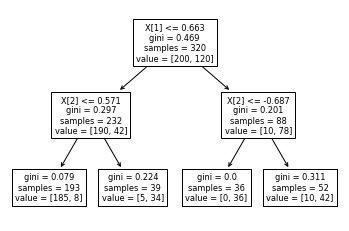

In [ ]:
from sklearn import tree
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train,y_train)
tree.plot_tree(dt)     

**Visualising the Test set results**

[Text(0.5, 0.8333333333333334, 'X[1] <= 0.471\ngini = 0.41\nsamples = 80\nvalue = [57, 23]'),
 Text(0.25, 0.5, 'X[2] <= 0.629\ngini = 0.188\nsamples = 57\nvalue = [51, 6]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 48\nvalue = [48, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.75, 0.5, 'X[2] <= -0.307\ngini = 0.386\nsamples = 23\nvalue = [6, 17]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.142\nsamples = 13\nvalue = [1, 12]')]

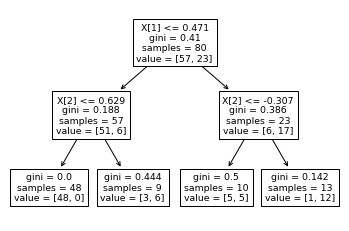

In [ ]:
from sklearn import tree
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_test,y_test)
tree.plot_tree(dt)